# Benchmark Statistics
#### Tianle Li\*, Evan Frick\*


## Install Dependencies

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown --folder https://drive.google.com/drive/folders/1dW1SugeP2kh5xM8xSY9bNLZjrkFcZI7N?usp=drive_link -O /content
!pip install -U scikit-learn==1.3

Retrieving folder contents
Processing file 10qErII3BFo9NQ_mrlI5BYdIummYHNFw0 alpaca_2.0_lc_results.jsonl
Processing file 1u8ODUn-nw3jLubXeVMVijJQinJVUcwxm alpaca_to_arena.json
Processing file 1D8bLtuVMbW2jcc3tooL7q-cS8GWUyLoc arena_to_arena_hard.json
Processing file 1FUvSbqtwFk7rdHO9ZVft_6f4Fyd_8d7Y bootstrap_stats_alpaca_LC.jsonl
Processing file 1vDTVb-MSkI5rPGl9XanAcO6j15jtlzMO bootstrap_stats_arena_hard.jsonl
Processing file 1BAW8RCK9wqNFnrdW7IRhBx6nERAKEZ0C bootstrap_stats_mt_bench.jsonl
Processing file 1aPPZOVdPKIZNgBX-yz0wAJj9neh5kbFx elo_results_20240329.pkl
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Error:

	[Errno 13] Permission denied: '/content'

To report issues, please visit https://github.com/wkentaro/gdown/issues.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 11.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scik

In [2]:
import pandas as pd
import numpy as np
import json

from math import comb
from tqdm import tqdm
from glob import glob
from collections import defaultdict

import json, math, gdown
import plotly.express as px
import requests

pd.options.display.float_format = '{:.2f}'.format

from sklearn.linear_model import LogisticRegression

## Overall Separability



In [3]:
def get_unique_overlapping_interval_pairs(df, key_lower="lower", key_upper="upper"):
    intervals = [[lower, upper] for lower, upper in zip(df[key_lower].tolist(), df[key_upper].tolist())]

    # Sort the intervals by start time
    intervals.sort(key=lambda x: x[0])

    overlapping_pairs = []
    for i in range(len(intervals)):
        for j in range(i+1, len(intervals)):
            # If the start time of the second interval is less than the end time of the first, they overlap
            if intervals[j][0] < intervals[i][1]:
                # Check if the pair is already in the list
                if (intervals[i], intervals[j]) not in overlapping_pairs and (intervals[j], intervals[i]) not in overlapping_pairs:
                    overlapping_pairs.append((intervals[i], intervals[j]))
            else:
                break

    return len(overlapping_pairs), comb(len(df), 2)


def print_overlap_count(overlap_count, total_count):
  print(f"Overlap Pair #: {overlap_count}, Total model Pair #: {total_count}")
  overlap_percenage = np.round(overlap_count / total_count * 100, decimals=2)
  print(f"Overlapped: {overlap_percenage}%")
  print(f"Confidence: {100 - overlap_percenage}%")

In [4]:
arena_hard = pd.read_json("bootstrap_stats_arena_hard.jsonl", lines=True) # Arena Hard
print(f"Arena Hard: {len(arena_hard) : >7} models")
overlap_count, total_count = get_unique_overlapping_interval_pairs(arena_hard)
print_overlap_count(overlap_count, total_count)

Arena Hard:      28 models
Overlap Pair #: 76, Total model Pair #: 378
Overlapped: 20.11%
Confidence: 79.89%


In [5]:
elo_results = pd.read_pickle("elo_results_20240329.pkl")
elo = elo_results['full']['leaderboard_table_df'].reset_index()
print(f"Chatbot Arena: {len(elo) : >7} models")
overlap_count, total_count = get_unique_overlapping_interval_pairs(elo, "rating_q025", "rating_q975")
print_overlap_count(overlap_count, total_count)

Chatbot Arena:      76 models
Overlap Pair #: 258, Total model Pair #: 2850
Overlapped: 9.05%
Confidence: 90.95%


In [6]:
mt_bench = pd.read_json("bootstrap_stats_mt_bench.jsonl", lines=True)
print(f"MT Bench: {len(mt_bench) : >7} models")
overlap_count, total_count = get_unique_overlapping_interval_pairs(mt_bench)
print_overlap_count(overlap_count, total_count)

MT Bench:      25 models
Overlap Pair #: 197, Total model Pair #: 300
Overlapped: 65.67%
Confidence: 34.33%


In [7]:
alpaca_lc = pd.read_json("bootstrap_stats_alpaca_LC.jsonl", lines=True)
print(f"Alpaca 2.0 LC: {len(alpaca_lc) : >7} models")
overlap_count, total_count = get_unique_overlapping_interval_pairs(alpaca_lc)
print_overlap_count(overlap_count, total_count)

Alpaca 2.0 LC:      20 models
Overlap Pair #: 23, Total model Pair #: 190
Overlapped: 12.11%
Confidence: 87.89%


## Benchmark Performance on shared 20 models

### Separability

In [8]:
alpaca_lc = pd.read_json("bootstrap_stats_alpaca_LC.jsonl", lines=True)
alpaca_to_arena = json.load(open("alpaca_to_arena.json"))
alpaca_lc["model"] = [alpaca_to_arena[model] for model in alpaca_lc.model]

In [9]:
print(f"Alpaca 2.0 LC: {len(alpaca_lc) : >7} models")
overlap_count, total_count = get_unique_overlapping_interval_pairs(alpaca_lc)
print_overlap_count(overlap_count, total_count)

Alpaca 2.0 LC:      20 models
Overlap Pair #: 23, Total model Pair #: 190
Overlapped: 12.11%
Confidence: 87.89%


In [10]:
alpaca = pd.read_json("bootstrap_stats_alpaca.jsonl", lines=True)
alpaca["model"] = [alpaca_to_arena[model] for model in alpaca.model]

In [11]:
print(f"Alpaca 2.0: {len(alpaca) : >7} models")
overlap_count, total_count = get_unique_overlapping_interval_pairs(alpaca)
print_overlap_count(overlap_count, total_count)

Alpaca 2.0:      20 models
Overlap Pair #: 55, Total model Pair #: 190
Overlapped: 28.95%
Confidence: 71.05%


In [12]:
arena_hard = pd.read_json("bootstrap_stats_arena_hard.jsonl", lines=True)
arena_to_arena_hard = json.load(open("arena_to_arena_hard.json"))
arena_hard_to_arena = {v: k for k, v in arena_to_arena_hard.items()}
arena_hard["model"] = arena_hard.model.str.lower()
arena_hard = arena_hard[arena_hard.model.isin(list(arena_hard_to_arena.keys()))]
arena_hard["model"] = [arena_hard_to_arena[model] for model in arena_hard.model]
arena_hard = arena_hard.reset_index(drop=True)

In [13]:
assert any([a == b for a, b in zip(sorted(list(arena_hard_to_arena.values())), sorted(list(alpaca_to_arena.values())))])

In [14]:
print(f"Arena Hard: {len(arena_hard) : >7} models")
overlap_count, total_count = get_unique_overlapping_interval_pairs(arena_hard)
print_overlap_count(overlap_count, total_count)

Arena Hard:      20 models
Overlap Pair #: 30, Total model Pair #: 190
Overlapped: 15.79%
Confidence: 84.21000000000001%


In [15]:
elo_subset = elo[elo["index"].isin(list(arena_to_arena_hard.keys()))]
elo_subset.reset_index(drop=True, inplace=True)

In [16]:
print(f"Chatbot Arena: {len(elo_subset) : >7} models")
overlap_count, total_count = get_unique_overlapping_interval_pairs(elo_subset, "rating_q025", "rating_q975")
print_overlap_count(overlap_count, total_count)

Chatbot Arena:      20 models
Overlap Pair #: 16, Total model Pair #: 190
Overlapped: 8.42%
Confidence: 91.58%


In [17]:
mt_bench = pd.read_json("bootstrap_stats_mt_bench.jsonl", lines=True)
arena_to_mt_bench = json.load(open("arena_to_mt_bench.json"))
mt_bench_to_arena = {v: k for k, v in arena_to_mt_bench.items()}
mt_bench["model"] = mt_bench.model.str.lower()
mt_bench = mt_bench[mt_bench.model.isin(list(mt_bench_to_arena.keys()))]
mt_bench["model"] = [mt_bench_to_arena[model] for model in mt_bench.model]
mt_bench.reset_index(drop=True, inplace=True)

In [18]:
print(f"MT Bench: {len(mt_bench) : >7} models")
overlap_count, total_count = get_unique_overlapping_interval_pairs(mt_bench)
print_overlap_count(overlap_count, total_count)

MT Bench:      20 models
Overlap Pair #: 121, Total model Pair #: 190
Overlapped: 63.68%
Confidence: 36.32%


### Strict Agreement

In [19]:
from itertools import combinations
from math import comb

In [20]:
assert any([a == b for a, b in zip(sorted(list(alpaca_lc.model)), sorted(list(elo_subset["index"])))])

In [21]:
count = 0
for model_a, model_b in combinations(list(alpaca_lc.model), 2):
    score_a = alpaca_lc[alpaca_lc["model"] == model_a].iloc[0]["score"]
    score_b = alpaca_lc[alpaca_lc["model"] == model_b].iloc[0]["score"]
    elo_a = elo_subset[elo_subset["index"] == model_a].iloc[0]["rating"]
    elo_b = elo_subset[elo_subset["index"] == model_b].iloc[0]["rating"]

    if score_a < score_b and elo_a < elo_b:
        count += 1
    elif score_a > score_b and elo_a > elo_b:
        count += 1
print(f"Alpaca 2.0 LC (strict): {count / comb(len(alpaca_lc), 2)}")

Alpaca 2.0 LC (strict): 0.8526315789473684


In [22]:
count = 0
for model_a, model_b in combinations(list(alpaca.model), 2):
    score_a = alpaca[alpaca["model"] == model_a].iloc[0]["score"]
    score_b = alpaca[alpaca["model"] == model_b].iloc[0]["score"]
    elo_a = elo_subset[elo_subset["index"] == model_a].iloc[0]["rating"]
    elo_b = elo_subset[elo_subset["index"] == model_b].iloc[0]["rating"]

    if score_a < score_b and elo_a < elo_b:
        count += 1
    elif score_a > score_b and elo_a > elo_b:
        count += 1
print(f"Alpaca 2.0 (strict): {count / comb(len(alpaca), 2)}")

Alpaca 2.0 (strict): 0.8105263157894737


In [23]:
count = 0
for model_a, model_b in combinations(list(arena_hard.model), 2):
    score_a = arena_hard[arena_hard["model"] == model_a].iloc[0]["score"]
    score_b = arena_hard[arena_hard["model"] == model_b].iloc[0]["score"]
    elo_a = elo_subset[elo_subset["index"] == model_a].iloc[0]["rating"]
    elo_b = elo_subset[elo_subset["index"] == model_b].iloc[0]["rating"]

    if score_a < score_b and elo_a < elo_b:
        count += 1
    elif score_a > score_b and elo_a > elo_b:
        count += 1
print(f"Arena Hard (strict): {count / comb(len(arena_hard), 2)}")

Arena Hard (strict): 0.9157894736842105


In [24]:
count = 0
for model_a, model_b in combinations(list(mt_bench.model), 2):
    score_a = mt_bench[mt_bench["model"] == model_a].iloc[0]["score"]
    score_b = mt_bench[mt_bench["model"] == model_b].iloc[0]["score"]
    elo_a = elo_subset[elo_subset["index"] == model_a].iloc[0]["rating"]
    elo_b = elo_subset[elo_subset["index"] == model_b].iloc[0]["rating"]

    if score_a < score_b and elo_a < elo_b:
        count += 1
    elif score_a > score_b and elo_a > elo_b:
        count += 1
print(f"MT Bench (strict): {count / comb(len(mt_bench), 2)}")

MT Bench (strict): 0.868421052631579


### Agreement With Confidence

In [25]:
def get_overlap(a, b):
    return max(0, min(a[1], b[1]) - max(a[0], b[0]))

def get_interval(df, model):
    row = df[df.model == model]
    assert len(row) == 1
    return (row.iloc[0].lower, row.iloc[0].upper)

def get_elo_interval(df, model):
    row = df[df["index"] == model]
    assert len(row) == 1
    return (row.iloc[0].rating_q025, row.iloc[0].rating_q975)

In [26]:
count = 0
total = 0
for model_a, model_b in combinations(list(alpaca_lc.model), 2):
    score_a = get_interval(alpaca_lc, model_a)
    score_b = get_interval(alpaca_lc, model_b)

    elo_a = get_elo_interval(elo_subset, model_a)
    elo_b = get_elo_interval(elo_subset, model_b)

    if get_overlap(elo_a, elo_b) > 0:
        continue

    total += 1

    if get_overlap(score_a, score_b) > 0:
        count += 0.5
        continue

    if score_a < score_b and elo_a < elo_b:
        count += 1
    elif score_a > score_b and elo_a > elo_b:
        count += 1
print(f"Alpaca 2.0 LC (With Confidence): {count / total}")

Alpaca 2.0 LC (With Confidence): 0.8728813559322034


In [27]:
count = 0
total = 0
for model_a, model_b in combinations(list(alpaca.model), 2):
    score_a = get_interval(alpaca, model_a)
    score_b = get_interval(alpaca, model_b)

    elo_a = get_elo_interval(elo_subset, model_a)
    elo_b = get_elo_interval(elo_subset, model_b)

    if get_overlap(elo_a, elo_b) > 0:
        continue

    total += 1

    if get_overlap(score_a, score_b) > 0:
        count += 0.5
        continue

    if score_a < score_b and elo_a < elo_b:
        count += 1
    elif score_a > score_b and elo_a > elo_b:
        count += 1
print(f"Alpaca 2.0 (With Confidence): {count / total}")

Alpaca 2.0 (With Confidence): 0.7909604519774012


In [28]:
count = 0
total = 0
for model_a, model_b in combinations(list(arena_hard.model), 2):
    score_a = get_interval(arena_hard, model_a)
    score_b = get_interval(arena_hard, model_b)

    elo_a = get_elo_interval(elo_subset, model_a)
    elo_b = get_elo_interval(elo_subset, model_b)

    if get_overlap(elo_a, elo_b) > 0:
        continue

    total += 1

    if get_overlap(score_a, score_b) > 0:
        count += 0.5
        continue

    if score_a < score_b and elo_a < elo_b:
        count += 1
    elif score_a > score_b and elo_a > elo_b:
        count += 1
print(f"Arena Hard (With Confidence): {count / total}")

Arena Hard (With Confidence): 0.903954802259887


In [29]:
count = 0
total = 0
for model_a, model_b in combinations(list(mt_bench.model), 2):
    score_a = get_interval(mt_bench, model_a)
    score_b = get_interval(mt_bench, model_b)

    elo_a = get_elo_interval(elo_subset, model_a)
    elo_b = get_elo_interval(elo_subset, model_b)

    if get_overlap(elo_a, elo_b) > 0:
        continue

    total += 1

    if get_overlap(score_a, score_b) > 0:
        count += 0.5
        continue

    if score_a < score_b and elo_a < elo_b:
        count += 1
    elif score_a > score_b and elo_a > elo_b:
        count += 1
print(f"MT Bench (With Confidence): {count / total}")

MT Bench (With Confidence): 0.6949152542372882


### Spearman Correlation

In [30]:
from scipy import stats

In [31]:
elo_subset = elo_subset.rename(columns={"index":"model"})

In [32]:
merged = pd.merge(elo_subset, alpaca_lc, on="model")
res = stats.spearmanr(merged.rating, merged.score)
print(f"Alpaca 2.0 LC: {res.statistic}")

Alpaca 2.0 LC: 0.8781954887218045


In [33]:
merged = pd.merge(elo_subset, alpaca, on="model")
res = stats.spearmanr(merged.rating, merged.score)
print(f"Alpaca 2.0: {res.statistic}")

Alpaca 2.0: 0.7578947368421052


In [34]:
merged = pd.merge(elo_subset, arena_hard, on="model")
res = stats.spearmanr(merged.rating, merged.score)
print(f"Arena Hard: {res.statistic}")

Arena Hard: 0.932330827067669


In [35]:
merged = pd.merge(elo_subset, mt_bench, on="model")
res = stats.spearmanr(merged.rating, merged.score)
print(f"MT Bench: {res.statistic}")

MT Bench: 0.8932330827067668


## Forecasting

In [36]:
from scipy.stats import norm
from seaborn.objects import Jitter, Plot, Dots
from sklearn.metrics import log_loss, brier_score_loss

In [56]:
def calculate_predictions_and_labels(model_list, pred_ratings, true_stats):
    output_records = []
    for model_a, model_b in combinations(sorted(model_list), 2):
        a_mean = pred_ratings['mean'][model_a]
        b_mean = pred_ratings['mean'][model_b]

        a_var = pred_ratings['var'][model_a]
        b_var = pred_ratings['var'][model_b]

        p_a_less_than_b = norm(loc=a_mean - b_mean, scale= np.sqrt(a_var + b_var)).cdf(0)

        try:
            tru = int(true_stats['rating'][model_a] < true_stats['rating'][model_b])
            true_p_a_less_than_b = norm(loc=true_stats['rating'][model_a]  - true_stats['rating'][model_b], scale= np.sqrt(true_stats['variance'][model_a] + true_stats['variance'][model_b])).cdf(0)       
        except:
            print(f"Warning: {model_a} or {model_b} not found in list of models in true_stats")
            continue
        
        output_records.append({"model_a": model_a, "model_b":  model_b, "a_mean": a_mean, "b_mean": b_mean, "p(a<b)": p_a_less_than_b, "p_true(a<b)": true_p_a_less_than_b, "label": tru})

    return pd.DataFrame.from_records(output_records)

In [57]:
arena_subset = elo[elo["index"].isin(list(arena_to_arena_hard.keys()))]
arena_subset = arena_subset.set_index("index")

In [58]:
alpaca_lc["mean"] = alpaca_lc.results.map(np.mean)
alpaca_lc["var"] = alpaca_lc.results.map(np.var)

In [59]:
arena_hard["mean"] = arena_hard.results.map(np.mean)
arena_hard["var"] = arena_hard.results.map(np.var)

In [60]:
alpaca["mean"] = alpaca.results.map(np.mean)
alpaca["var"] = alpaca.results.map(np.var)

In [61]:
mt_bench["mean"] = mt_bench.results.map(np.mean)
mt_bench["var"] = mt_bench.results.map(np.var)

In [62]:
alpaca_lc_results = calculate_predictions_and_labels(alpaca_lc.model.to_list(), 
                                                  alpaca_lc.set_index("model")[['mean', 'var']].to_dict(), 
                                                  arena_subset[["rating", "variance"]].to_dict())
arena_results = calculate_predictions_and_labels(arena_hard.model.to_list(), 
                                                 arena_hard.set_index("model")[['mean', 'var']].to_dict(), 
                                                 arena_subset[["rating", "variance"]].to_dict())
alpaca_results = calculate_predictions_and_labels(alpaca.model.to_list(), 
                                                  alpaca.set_index("model")[['mean', 'var']].to_dict(), 
                                                  arena_subset[["rating", "variance"]].to_dict())
mt_bench_results = calculate_predictions_and_labels(mt_bench.model.to_list(), 
                                                  mt_bench.set_index("model")[['mean', 'var']].to_dict(), 
                                                  arena_subset[["rating", "variance"]].to_dict())

In [63]:
print("Alpaca 2.0 LC Log-Loss: ", log_loss(alpaca_lc_results['label'], alpaca_lc_results['p(a<b)']))
print("Alpaca 2.0 Log-Loss: ", log_loss(alpaca_results['label'], alpaca_results['p(a<b)']))
print("Arena Hard Log-Loss: ", log_loss(arena_results['label'], arena_results['p(a<b)']))
print("MT Bench Log-Loss: ", log_loss(mt_bench_results['label'], mt_bench_results['p(a<b)']))
print()
print("Alpaca 2.0 LC Brier-Score-Loss: ", brier_score_loss(alpaca_lc_results['label'], alpaca_lc_results['p(a<b)']))
print("Alpaca 2.0 Brier-Score-Loss: ", brier_score_loss(alpaca_results['label'], alpaca_results['p(a<b)']))
print("Arena Hard Brier-Score-Loss: ", brier_score_loss(arena_results['label'], arena_results['p(a<b)']))
print("MT Bench Brier-Score-Loss: ", brier_score_loss(mt_bench_results['label'], mt_bench_results['p(a<b)']))

Alpaca 2.0 LC Log-Loss:  1.9652927160512885
Alpaca 2.0 Log-Loss:  1.8408659325008474
Arena Hard Log-Loss:  0.3950460397256576
MT Bench Log-Loss:  0.3310536497002041

Alpaca 2.0 LC Brier-Score-Loss:  0.13472585300420672
Alpaca 2.0 Brier-Score-Loss:  0.16421065021224288
Arena Hard Brier-Score-Loss:  0.07047865504650436
MT Bench Brier-Score-Loss:  0.10082905842501223


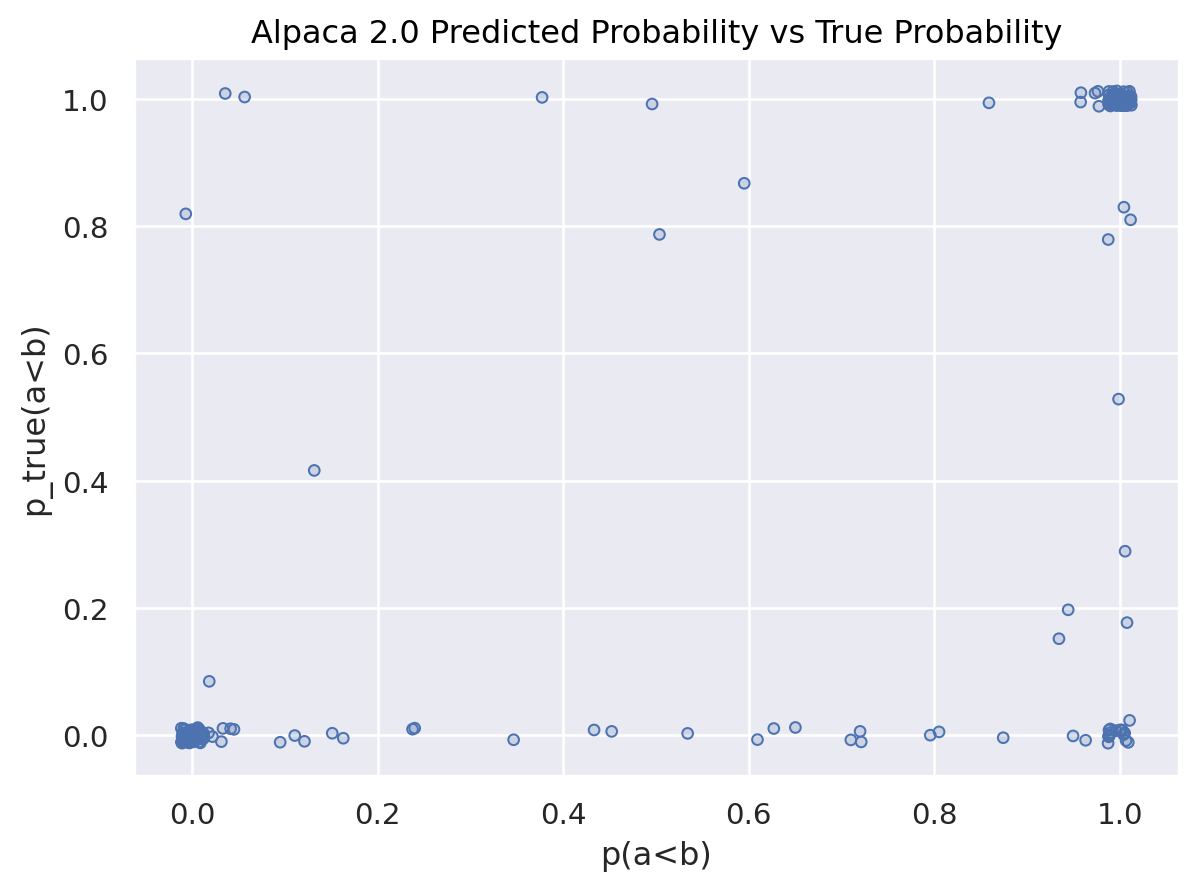

In [64]:
Plot(data=alpaca_results, x='p(a<b)', y='p_true(a<b)').add(Dots(), Jitter(x=0.025, y=0.025)).label(title="Alpaca 2.0 Predicted Probability vs True Probability")

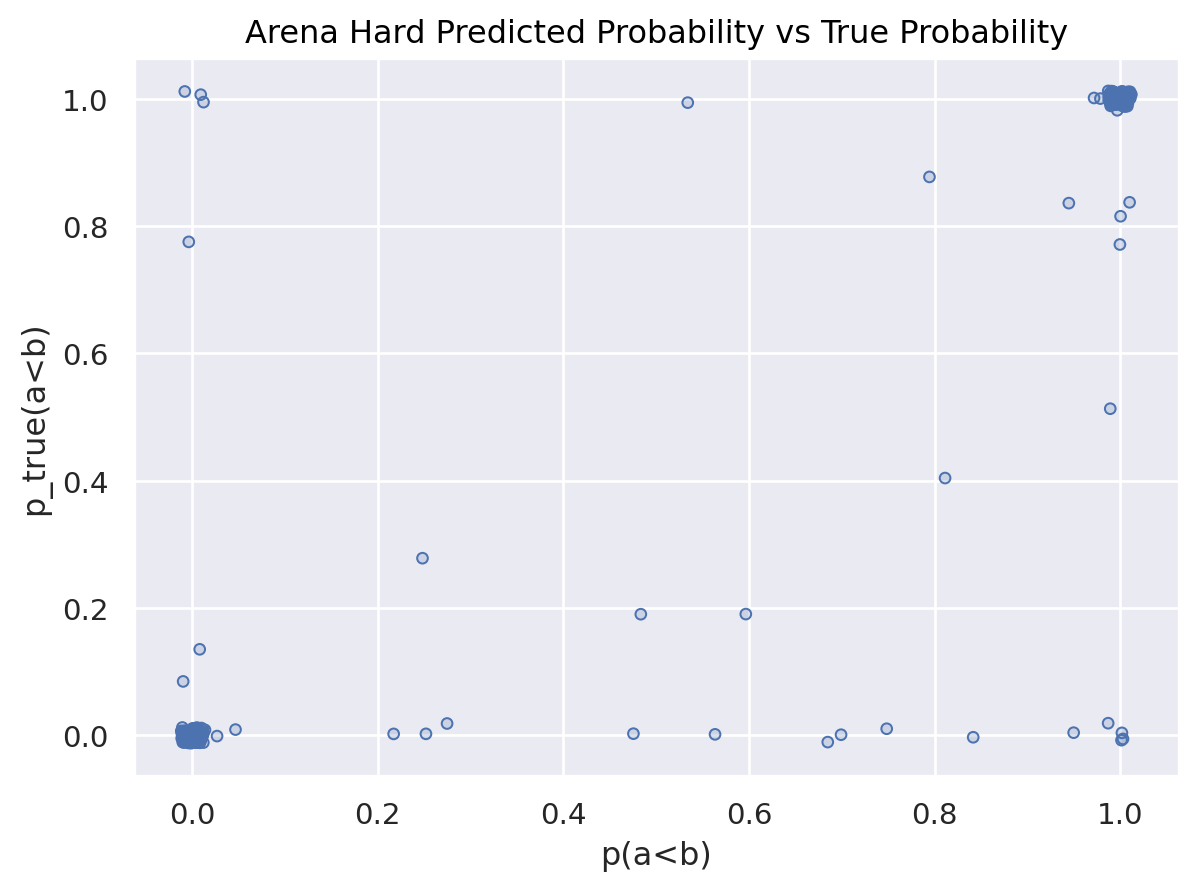

In [65]:
Plot(data=arena_results, x='p(a<b)', y='p_true(a<b)').add(Dots(), Jitter(x=0.025, y=0.025)).label(title="Arena Hard Predicted Probability vs True Probability")

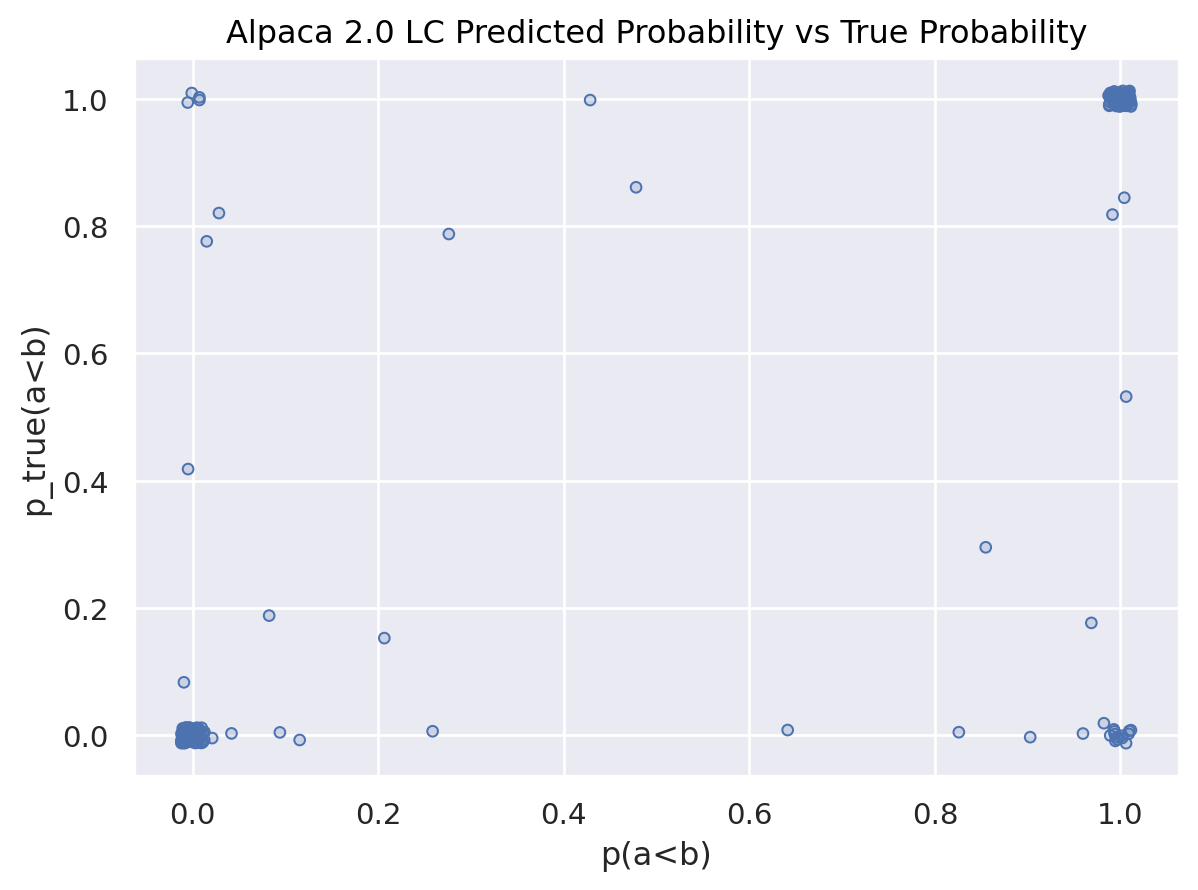

In [66]:
Plot(data=alpaca_lc_results, x='p(a<b)', y='p_true(a<b)').add(Dots(), Jitter(x=0.025, y=0.025)).label(title="Alpaca 2.0 LC Predicted Probability vs True Probability")

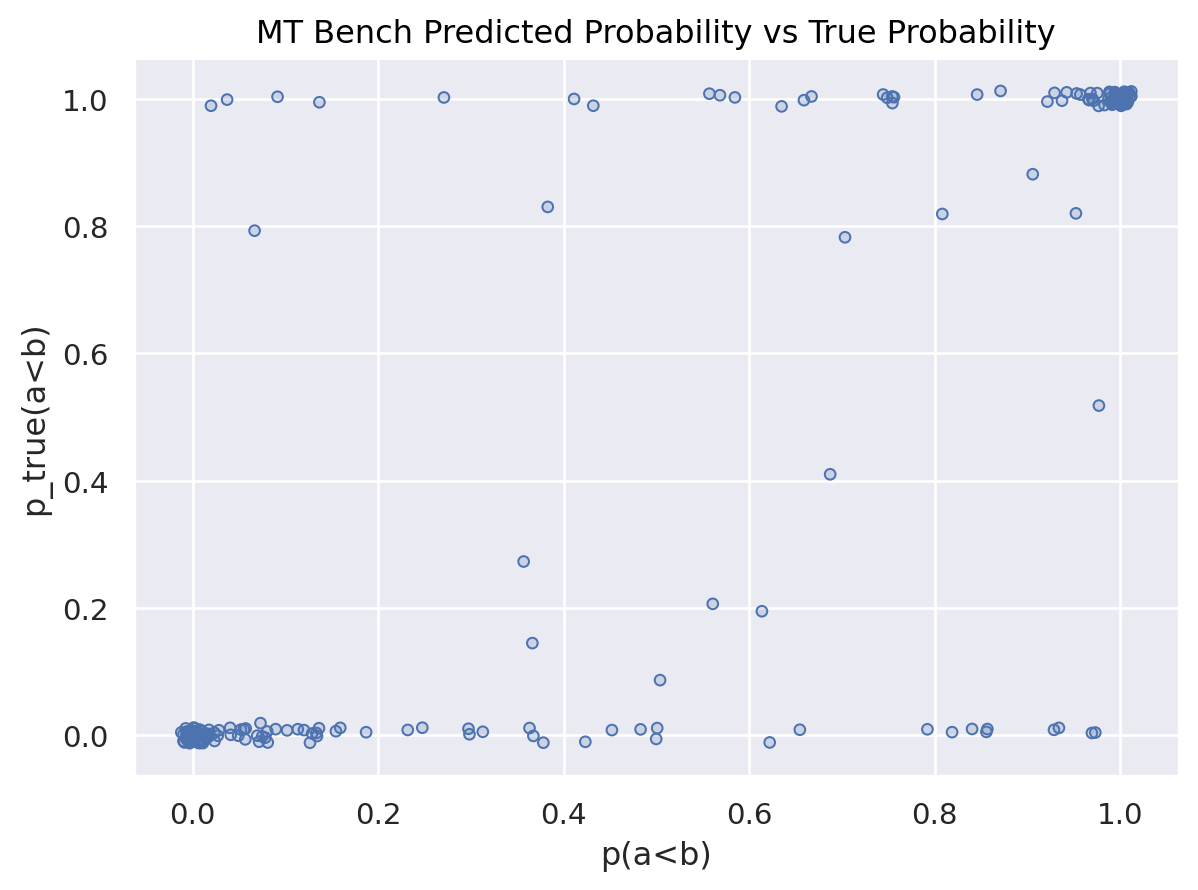

In [67]:
Plot(data=mt_bench_results, x='p(a<b)', y='p_true(a<b)').add(Dots(), Jitter(x=0.025, y=0.025)).label(title="MT Bench Predicted Probability vs True Probability")

In [55]:
arena_results

,model_a,model_b,a_mean,b_mean,p(a<b),p_true(a<b),label
0,gpt-3.5-turbo-1106,claude-3-sonnet-20240229,18.89,46.78,1.00,1.00,1
1,gpt-3.5-turbo-1106,llama-2-70b-chat,18.89,11.60,0.00,1.00,1
2,gpt-3.5-turbo-1106,gpt-3.5-turbo-0613,18.89,24.84,1.00,1.00,1
3,gpt-3.5-turbo-1106,gemma-2b-it,18.89,3.02,0.00,0.00,0
4,gpt-3.5-turbo-1106,mixtral-8x7b-instruct-v0.1,18.89,23.28,0.98,1.00,1
...,...,...,...,...,...,...,...
185,claude-3-opus-20240229,mistral-large-2402,60.37,37.71,0.00,0.00,0
186,claude-3-opus-20240229,gpt-4-0314,60.37,50.00,0.00,0.00,0
187,claude-2.1,mistral-large-2402,22.72,37.71,1.00,1.00,1
188,claude-2.1,gpt-4-0314,22.72,50.00,1.00,1.00,1
